<a href="https://colab.research.google.com/github/dupeljan/computer-vision-HSE/blob/master/2021/3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third homework: 
perform operation under image - conv 3x3x3 -> norm -> ReLU -> pooling -> pixelwise softmax

In [162]:
import torch
from torch import nn
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Create the model

In [194]:
model = nn.Sequential(
    nn.Conv2d(3, 5, 3),
    nn.BatchNorm2d(5, affine= False),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Softmax2d()
)
for param in model.parameters():
    param.requires_grad = False

In [195]:
model

Sequential(
  (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Softmax2d()
)

Get image

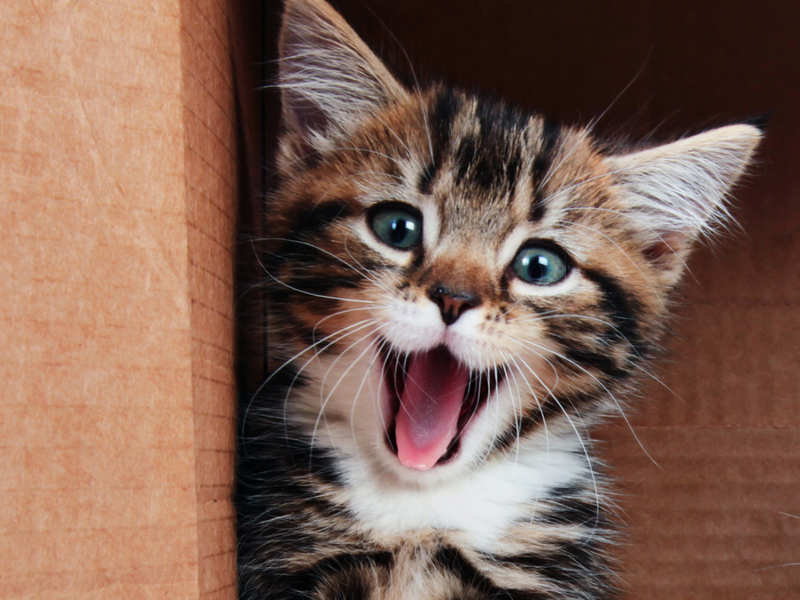

In [201]:
!wget -q -O kitty.jpg https://static.toiimg.com/thumb/msid-72519407,width-800,height-600,resizemode-75,imgsize-1113261,pt-32,y_pad-40/72519407.jpg
img = cv2.imread('kitty.jpg')
cv2_imshow(img)

Set layout

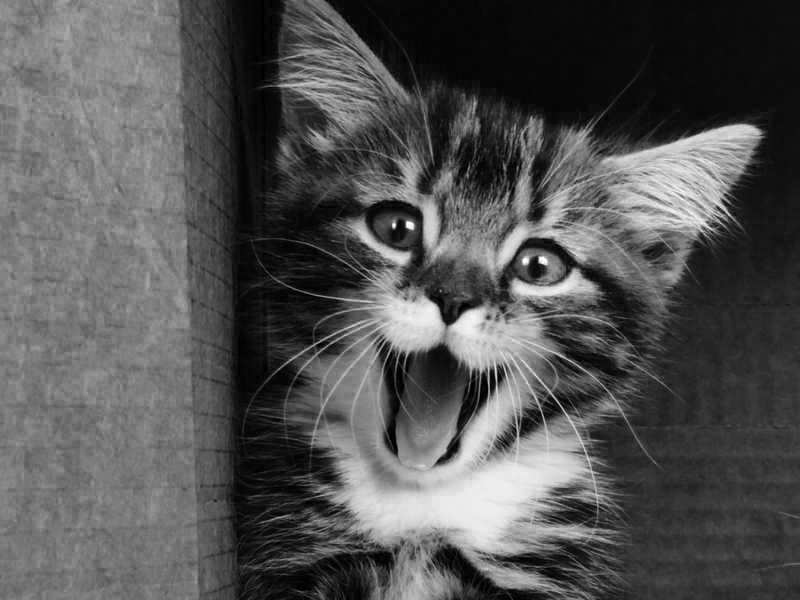

In [176]:
img_new_layout = np.array([img[:,:,i] for i in range(3)])
img_new_layout = img_new_layout.reshape((1,) + img_new_layout.shape)
cv2_imshow(img_new_layout[0,0])

In [196]:
inp = torch.from_numpy(img_new_layout.astype(np.float)).double()
model.double().eval()
out = model(inp)
out.shape

torch.Size([1, 5, 299, 399])

In [199]:
out

tensor([[[[3.0461e-34, 1.4942e-34, 2.1378e-32,  ..., 8.8127e-14,
           8.8127e-14, 8.8127e-14],
          [3.6126e-33, 1.0224e-33, 1.1140e-31,  ..., 8.8127e-14,
           8.8127e-14, 8.8127e-14],
          [3.6171e-31, 7.9945e-32, 4.3107e-30,  ..., 8.8127e-14,
           8.8127e-14, 8.8127e-14],
          ...,
          [3.2025e-38, 2.5064e-38, 1.5824e-38,  ..., 2.2744e-26,
           2.0735e-26, 2.6843e-26],
          [3.7037e-37, 1.8935e-36, 2.4167e-36,  ..., 2.1560e-25,
           1.6961e-25, 1.6192e-25],
          [4.6684e-37, 1.2298e-35, 4.2415e-34,  ..., 3.4300e-25,
           2.7623e-25, 2.1729e-25]],

         [[8.1677e-18, 2.5117e-19, 3.2498e-14,  ..., 8.0542e-13,
           8.0542e-13, 8.0542e-13],
          [1.5037e-15, 9.4496e-19, 2.4351e-14,  ..., 8.0542e-13,
           8.0542e-13, 8.0542e-13],
          [4.5938e-12, 3.5435e-15, 1.2407e-11,  ..., 8.0542e-13,
           8.0542e-13, 8.0542e-13],
          ...,
          [4.7909e-25, 4.1555e-25, 2.0755e-25,  ..., 5.0443